# M5 - W4 Assignment: Unsupervised Learning

One of the main applications of unsupervised learning is dimensionality reduction / feature selection. Often it is a step preceding building a supervised learning model with labelled data. Other times, we don’t have a label but still need to perform dimensionality reduction and/or find clusters in the data.

In this assignment, you are asked to work on the Mercedes- Benz Greener Manufacturing challenge from Kaggle. Go to the Kaggle link: https://www.kaggle.com/c/mercedes-benz-greener-manufacturing/overviewLinks to an external site. and download the training and testing data sets.

The data has been anonymised and there is target, called ‘y’ but we will not be training a supervised model in this assignment (you are still free and encouraged to do that for the sake of practice).

- Download, load and clean the data. Do not forget to normalize it.
- Perform a principle component analysis (PCA). How many components will you choose based on an explained variance ratio of your choice? Plot the proportion of explained variance and the number of components.
- One downside of PCA is that it maps all the original features to a lower dimensional space, resulting in less interpretable features. Let’s say we want to use the result of the PCA but still work with the original features. Here is what we can do. Using the selected number of components from 2), find which features of the original data have the highest absolute correlation with each of the components. Select features with absolute correlation with the PCA components of at least 0,75. How many and which features will you end up with?

# Step 1: Exploratory Data Analysis

In [1]:
import pandas as pd
import os
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

# Setting the working directory and loading the data
os.chdir("C:\\Users\\ManosIeronymakisProb\\OneDrive - Probability\\Bureaublad\\ELU\\M5 - W4 Assignment Unsupervised Learning")
filepath = "train.csv"
df = pd.read_csv(filepath)

# Question 1: Download, load and clean the data. Do not forget to normalize it.

## Checking for missing values
print("Missing Values:")
print(df.isnull().sum())

## Checking for duplicates
print("\nDuplicate Rows:")
print(df.duplicated().sum())

## Encoding categorical variables into dummy variables
object_columns = df.select_dtypes(include=['object']).columns
df_dummies = pd.get_dummies(df, columns=object_columns)
df_dummies = df_dummies.astype(int)

## Removing duplicate columns
def get_duplicate_columns(df_dummies):
    duplicate_column_names = set()
    for x in range(df.shape[1]):
        col = df.iloc[:, x]
        for y in range(x + 1, df.shape[1]):
            other_col = df.iloc[:, y]
            if col.equals(other_col):
                duplicate_column_names.add(df.columns.values[y])
    return list(duplicate_column_names)

duplicate_columns = get_duplicate_columns(df_dummies)
print(f'\nDuplicate Columns: {duplicate_columns}')

## Removing 'ID' and 'y' columns
df_features = df_dummies.drop(['ID', 'y'], axis=1)

## Removing duplicate columns
df_features = df_features.drop(duplicate_columns, axis=1)

Missing Values:
ID      0
y       0
X0      0
X1      0
X2      0
       ..
X380    0
X382    0
X383    0
X384    0
X385    0
Length: 378, dtype: int64

Duplicate Rows:
0

Duplicate Columns: ['X279', 'X134', 'X289', 'X213', 'X326', 'X302', 'X113', 'X385', 'X232', 'X253', 'X76', 'X330', 'X233', 'X235', 'X293', 'X102', 'X262', 'X37', 'X297', 'X347', 'X296', 'X119', 'X107', 'X172', 'X122', 'X227', 'X147', 'X216', 'X245', 'X266', 'X239', 'X242', 'X243', 'X365', 'X364', 'X268', 'X94', 'X199', 'X35', 'X222', 'X84', 'X254', 'X290', 'X320', 'X146', 'X244', 'X324', 'X226', 'X382', 'X247', 'X299', 'X39', 'X93', 'X360', 'X214', 'X248']


- Data Preparation: Handling Missing Values, Removing Duplicate Columns, and Creating Dummy Variables

- In the first step, we check for missing values in the dataset and find that there are none. Next, we proceed to check for duplicate columns and remove them to ensure data integrity. By removing duplicate columns, we avoid redundancy in our feature set.

- Afterwards, we address the categorical columns by creating dummy variables. This process converts categorical variables into binary indicators, allowing us to proceed with the normalization step in the next phase.

- These initial data preparation steps set the foundation for further analysis and dimensionality reduction techniques.

# Step 2: Principle Component Analysis, Determining Optimal Number of Components

In [2]:
## Normalizing the features
scaler = StandardScaler()
df_features_normalized = scaler.fit_transform(df_features)


The optimal number of components based on an explained variance ratio of 0.95 is: 247


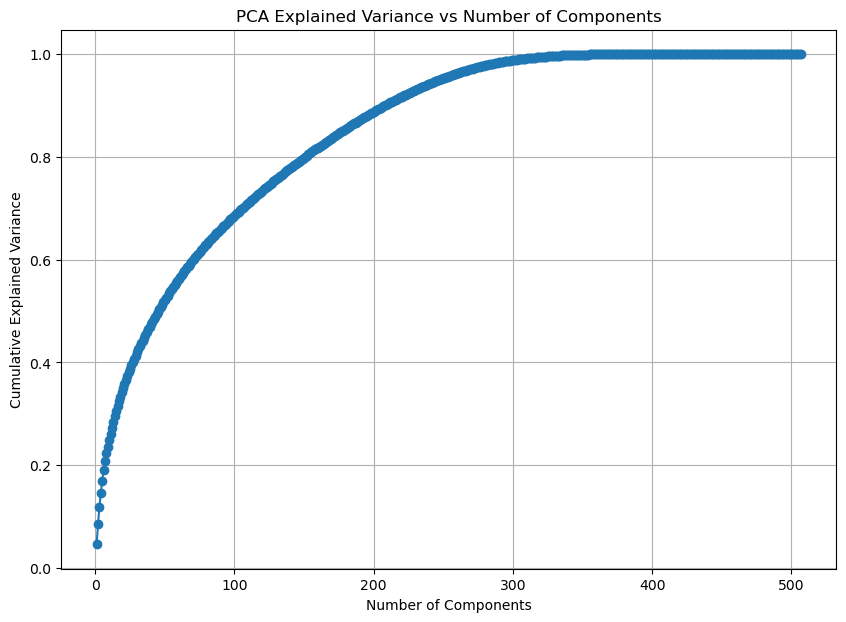

In [3]:
## Performing PCA to determine the optimal number of components
pca = PCA()
pca.fit(df_features_normalized)

## Calculating cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

## Setting the desired explained variance ratio
desired_variance = 0.95

## Finding the optimal number of components
n_components = np.where(cumulative_explained_variance > desired_variance)[0][0] + 1

print(f'\nThe optimal number of components based on an explained variance ratio of {desired_variance} is: {n_components}')

## Plotting the cumulative explained variance
plt.figure(figsize=(10, 7))
plt.plot(range(1, len(cumulative_explained_variance)+1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance vs Number of Components')
plt.grid(True)
plt.show()


- To perform dimensionality reduction, we employ Principal Component Analysis (PCA) on our dataset. The goal is to capture the maximum amount of information while reducing the dimensionality of the feature set.

- First, we normalize the features using the StandardScaler to ensure that all variables are on the same scale. This step is crucial for the accuracy and reliability of PCA.

- Next, we conduct PCA and calculate the cumulative explained variance for each component. The cumulative explained variance represents the proportion of total variance explained by the selected components.

- In our case, we set a desired explained variance ratio of 0.95. We determine the optimal number of components by identifying the point where the cumulative explained variance exceeds this threshold. For our dataset, the optimal number of components is found to be 247.

- To visualize the explained variance and the number of components, we plot a curve showing the cumulative explained variance against the number of components. The curve illustrates how the cumulative explained variance increases as the number of components grows, providing insights into the amount of information retained at different dimensions.

- This analysis allows us to strike a balance between dimensionality reduction and information preservation, guiding us in selecting an appropriate number of components for subsequent analysis.

# Step 3 : Identification of Features Highly Correlated with PCA Components

In [4]:
## Performing PCA with the optimal number of components
pca = PCA(n_components=n_components)
df_pca = pca.fit_transform(df_features_normalized)

## Calculating the absolute correlation between original features and PCA components
correlations = pd.DataFrame(columns=['Feature', 'PC', 'Correlation'])
for i in range(df_features_normalized.shape[1]):
    feature = df_features.columns[i]
    for j in range(n_components):
        correlation = np.abs(np.corrcoef(df_features_normalized[:, i], df_pca[:, j])[0, 1])
        correlations = pd.concat([correlations, pd.DataFrame({'Feature': [feature], 'PC': [f'PC{j+1}'], 'Correlation': [correlation]})], ignore_index=True)

## Selecting features with absolute correlation of at least 0.75 with any of the PCA components
selected_features = correlations[correlations['Correlation'] >= 0.75]

print(f'\nThe number of selected features with an absolute correlation of at least 0.75 is: {len(selected_features)}')
print("\nSelected features:")
for feature, pc, correlation in selected_features.values:
    print(f"Feature: {feature}, PC: {pc}, Correlation: {correlation}")

C:\Users\ManosIeronymakisProb\.conda\envs\probailityDev\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\ManosIeronymakisProb\.conda\envs\probailityDev\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]



The number of selected features with an absolute correlation of at least 0.75 is: 33

Selected features:
Feature: X29, PC: PC2, Correlation: 0.8150295928458684
Feature: X48, PC: PC1, Correlation: 0.7977068316358591
Feature: X54, PC: PC2, Correlation: 0.814369432287582
Feature: X66, PC: PC1, Correlation: 0.8007996439145838
Feature: X80, PC: PC1, Correlation: 0.862719308094217
Feature: X88, PC: PC8, Correlation: 0.8188828664174133
Feature: X90, PC: PC8, Correlation: 0.814011911997338
Feature: X98, PC: PC1, Correlation: 0.7614652982066062
Feature: X99, PC: PC8, Correlation: 0.7684041641046286
Feature: X101, PC: PC1, Correlation: 0.7955465508431856
Feature: X111, PC: PC1, Correlation: 0.8023037707096684
Feature: X126, PC: PC1, Correlation: 0.8346322148287302
Feature: X128, PC: PC1, Correlation: 0.8281769423486082
Feature: X130, PC: PC1, Correlation: 0.8281769423486082
Feature: X136, PC: PC2, Correlation: 0.814369432287582
Feature: X162, PC: PC2, Correlation: 0.8015431209641185
Feature: X1

- One downside of PCA is that it reduces the original features to a lower-dimensional space, making the resulting features less interpretable. However, we can still work with the original features while leveraging the results of PCA.

- To accomplish this, we select the optimal number of components obtained in the previous step, which is 247 in our case. We then calculate the absolute correlation between each original feature and each PCA component.

- By selecting features with an absolute correlation of at least 0.75 with any of the PCA components, we ensure that the selected features have a strong relationship with the transformed components. This threshold helps us retain meaningful information while reducing the number of features.

- In our analysis, we find that 33 features meet this criterion. These features exhibit a high absolute correlation with specific PCA components, enabling us to leverage the benefits of PCA while still working with interpretable features.

- The selected features and their corresponding PCA components and correlations are as follows:

X29 with PC2: Correlation of 0.8150295928458684

X48 with PC1: Correlation of 0.7977068316358591

X54 with PC2: Correlation of 0.814369432287582

X66 with PC1: Correlation of 0.8007996439145838

X80 with PC1: Correlation of 0.862719308094217

X88 with PC8: Correlation of 0.8188828664174133

X90 with PC8: Correlation of 0.814011911997338

X98 with PC1: Correlation of 0.7614652982066062

X99 with PC8: Correlation of 0.7684041641046286

X101 with PC1: Correlation of 0.7955465508431856

X111 with PC1: Correlation of 0.8023037707096684

X126 with PC1: Correlation of 0.8346322148287302

X128 with PC1: Correlation of 0.8281769423486082

X130 with PC1: Correlation of 0.8281769423486082

X136 with PC2: Correlation of 0.814369432287582

X162 with PC2: Correlation of 0.8015431209641185

X170 with PC1: Correlation of 0.7547793299910257

X179 with PC1: Correlation of 0.8069176201365129

X189 with PC1: Correlation of 0.7801259264162718

X198 with PC1: Correlation of 0.8015355927290444

X217 with PC8: Correlation of 0.8161444082049608

X238 with PC1: Correlation of 0.7824238435365299

X249 with PC8: Correlation of 0.8116052890484691

X263 with PC2: Correlation of 0.8150295928458686

X264 with PC1: Correlation of 0.8343310169356922

X265 with PC1: Correlation of 0.8248552489980802

X272 with PC2: Correlation of 0.783785445712857

X276 with PC2: Correlation of 0.7841759661803371

X328 with PC2: Correlation of 0.8010581537487783

X348 with PC1: Correlation of 0.8642091234930797

X0_ap with PC1: Correlation of 0.7982474479151318

X0_az with PC2: Correlation of 0.8054322127425085

X2_s with PC1: Correlation of 0.7977068316358591

- These selected features provide valuable insights and maintain a strong relationship with the PCA components, enabling us to work with more interpretable features while leveraging the benefits of dimensionality reduction through PCA.